In [39]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import sklearn
import sklearn.preprocessing as sp

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
TrainData = pd.read_csv("train.csv", index_col=0)
TestData = pd.read_csv("test.csv", index_col=0)
print(TrainData.shape)
print(TestData.shape)
print(TrainData.head())
TestData.head()

(1460, 80)
(1459, 79)
    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
Id                                    ...                             
1          Lvl    AllPub    Inside    ...            0    NaN   NaN   
2          Lvl    AllPub       FR2    ...            0    NaN   NaN   
3          Lvl    AllPub    Inside    ...            0    NaN   NaN   
4          Lvl    AllPub    Corner    ...            0    NaN   NaN   
5          Lvl    AllPub       FR2    ...            0

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022388F64B00>,
      dtype=object)

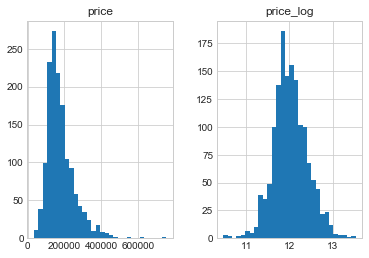

In [4]:
price = pd.DataFrame({"price":TrainData.SalePrice, "price_log":np.log(TrainData.SalePrice)})
price.hist(bins=30)

In [5]:
train_label_log = pd.DataFrame({"price_log":np.log(TrainData.pop("SalePrice"))})
print(train_label_log.head())

    price_log
Id           
1   12.247694
2   12.109011
3   12.317167
4   11.849398
5   12.429216


In [6]:
train_test_features = pd.concat([TrainData, TestData])

In [7]:
train_test_features.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
train_test_features["MSSubClass"] = train_test_features.MSSubClass.astype("str")
train_test_features["MSSubClass"].head()

Id
1    60
2    20
3    60
4    70
5    60
Name: MSSubClass, dtype: object

In [9]:
train_test_features["MSSubClass"].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [10]:
train_test_dummy_features = pd.get_dummies(train_test_features)
print(train_test_dummy_features.MSSubClass_150.dtype)
print(train_test_dummy_features.OverallQual.dtype)
train_test_dummy_features.head()

uint8
int64


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [11]:
train_test_dummy_features.isnull().sum().sort_values(ascending=False).head(15)

LotFrontage             486
GarageYrBlt             159
MasVnrArea               23
BsmtHalfBath              2
BsmtFullBath              2
BsmtFinSF2                1
GarageCars                1
TotalBsmtSF               1
BsmtUnfSF                 1
GarageArea                1
BsmtFinSF1                1
Condition1_Artery         0
Condition2_Feedr          0
Condition2_Artery         0
Neighborhood_Somerst      0
dtype: int64

In [12]:
train_test_dummy_fill_features = train_test_dummy_features.fillna(train_test_dummy_features.mean())
print(train_test_dummy_fill_features.isnull().sum().sum())
train_test_dummy_fill_features.head()

0


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [13]:
# 将numerical的数据类型，进行normal 标准化 


In [14]:
numerical_features = train_test_dummy_fill_features.dtypes[train_test_dummy_fill_features.dtypes != "uint8"].index
print(type(numerical_features))
print(numerical_features.shape)
numerical_features

<class 'pandas.core.indexes.base.Index'>
(35,)


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [15]:
# 用sklearn里自带的scale函数将numerical 类型的数据标准化
train_test_dummy_fill_features[numerical_features] = sp.scale(train_test_dummy_fill_features[numerical_features])
train_test_dummy_fill_features.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.202068,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.525202,0.580907,-0.29313,-0.934863,...,0,0,0,1,0,0,0,0,1,0
2,0.501870,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.572250,1.178112,-0.29313,-0.629896,...,0,0,0,1,0,0,0,0,1,0
3,-0.061280,0.137197,0.646183,-0.507284,0.980221,0.848965,0.334828,0.097873,-0.29313,-0.288516,...,0,0,0,1,0,0,0,0,1,0
4,-0.436714,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.572250,-0.494941,-0.29313,-0.047275,...,0,0,0,1,1,0,0,0,0,0
5,0.689587,0.518903,1.355551,-0.507284,0.947203,0.753229,1.387486,0.468931,-0.29313,-0.161068,...,0,0,0,1,0,0,0,0,1,0


In [16]:
# 开始建立模型
# 先把整合在一起的train_dataset, test_dataset 分开

In [17]:
train_test_dummy_fill_features.shape
train_test_dummy_fill_features.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.202068,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.525202,0.580907,-0.29313,-0.934863,...,0,0,0,1,0,0,0,0,1,0
2,0.501870,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.572250,1.178112,-0.29313,-0.629896,...,0,0,0,1,0,0,0,0,1,0
3,-0.061280,0.137197,0.646183,-0.507284,0.980221,0.848965,0.334828,0.097873,-0.29313,-0.288516,...,0,0,0,1,0,0,0,0,1,0
4,-0.436714,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.572250,-0.494941,-0.29313,-0.047275,...,0,0,0,1,1,0,0,0,0,0
5,0.689587,0.518903,1.355551,-0.507284,0.947203,0.753229,1.387486,0.468931,-0.29313,-0.161068,...,0,0,0,1,0,0,0,0,1,0


In [18]:
print(TrainData.index.shape)
print(TestData.index.shape)


(1460,)
(1459,)


In [19]:
train_features = train_test_dummy_fill_features.loc[TrainData.index]
test_features = train_test_dummy_fill_features.loc[TestData.index]
print(train_features.shape)
print(test_features.shape)


(1460, 303)
(1459, 303)


In [20]:
        from xgboost import XGBRegressor
        import sklearn.model_selection as ms
        import sklearn.ensemble as se

In [21]:
# 模型一
model = XGBRegressor(5)
ms.cross_val_score(model, train_features, train_label_log, cv=10)

array([0.89331705, 0.92454213, 0.93379813, 0.84519676, 0.89509133,
       0.91644188, 0.87432767, 0.92356307, 0.89014923, 0.85758062])

In [22]:
model = XGBRegressor(4)
ms.cross_val_score(model, train_features, train_label_log, cv=5)

array([0.90980136, 0.87655958, 0.89873408, 0.88106775, 0.88817343])

In [23]:
model.fit(train_features, train_label_log)
pred_y1 = model.predict(test_features)
pred_y1

array([11.714167, 11.989975, 12.117035, ..., 11.989666, 11.68033 ,
       12.356928], dtype=float32)

In [24]:
pred_y1 = np.exp(pred_y1)
pred_y1

array([122291.97, 161131.33, 182962.2 , ..., 161081.55, 118223.27,
       232565.66], dtype=float32)

In [25]:
submission_df1 = pd.DataFrame({"Id":test_features.index, "SalePrice":pred_y1})
submission_df1.head()

,Id,SalePrice
0,1461,122291.968750
1,1462,161131.328125
2,1463,182962.203125
3,1464,185094.734375
4,1465,194526.328125


In [26]:
# 导出预测完的最终csv文件
submission_df1.to_csv("sample_submission1.csv", index=False)

In [27]:
#  模型二
model2 = se.RandomForestRegressor(200)
model2.fit(train_features, train_label_log)
model2.score(train_features, train_label_log)

0.9827941744993293

In [28]:
model3 = ms.GridSearchCV(model2, [{"n_estimators":[50, 100, 200, 300]}], cv=3)
model3

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [50, 100, 200, 300]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
model3.fit(train_features, train_label_log)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [50, 100, 200, 300]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
model3.best_params_

{'n_estimators': 300}

In [31]:
pred_y3 = model3.predict(test_features)
pred_y3

array([11.74972456, 11.94127785, 12.08723202, ..., 11.92997271,
       11.63582878, 12.35994283])

In [32]:
pred_y3 = np.exp(pred_y3)
pred_y3

array([126718.65097201, 153472.68001911, 177589.86033679, ...,
       151747.41978102, 113077.508256  , 233267.89250134])

In [33]:
submission_df3 = pd.DataFrame({"Id":test_features.index, "SalePrice":pred_y3})
submission_df3.head()

,Id,SalePrice
0,1461,126718.650972
1,1462,153472.680019
2,1463,177589.860337
3,1464,182441.285745
4,1465,197957.674829


In [34]:
# 导出预测完的最终csv文件
submission_df3.to_csv("sample_submission3.csv", index=False)

In [35]:
# ---------------------------分割线--------------------------

In [36]:
# xgboost好像不能直接用在sklearn自己的gridsearch。。。。。。（自己做个循环好了）

In [41]:
# 反过头去看kaggle的evaluation metric， 发现评分是按照MSE来的， 重新改了scoring
scores = []
for depth in range(3, 8):
    clf = XGBRegressor(max_depth=depth)
    test_scores_array = np.sqrt(np.abs(ms.cross_val_score(clf, train_features, train_label_log, cv=5, scoring="neg_mean_squared_error")))
    scores.append(test_scores_array.mean())

In [42]:
scores

[0.13095653440519078,
 0.1315574773218447,
 0.1314338656534591,
 0.13158701979757506,
 0.13380939823464552]

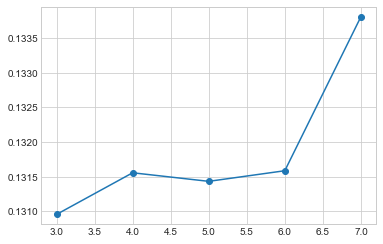

In [43]:
plt.figure()
plt.plot(range(3, 8), scores, "o-")

In [44]:
model4 = XGBRegressor(5)
model4.fit(train_features, train_label_log)
pred_y4 = model4.predict(test_features)
pred_y4 = np.exp(pred_y4)
submission_df4 = pd.DataFrame({"Id":test_features.index, "SalePrice":pred_y4})
submission_df4.head()

,Id,SalePrice
0,1461,124921.312500
1,1462,158958.359375
2,1463,188168.468750
3,1464,188127.734375
4,1465,184879.500000


In [45]:
# 导出预测完的最终csv文件
submission_df3.to_csv("sample_submission4.csv", index=False)

In [ ]:
# ---------------------------分割线--------------------------

In [ ]:
# 不行，分数越来越低，莫名其妙
# 考虑自己拆分验证集，自己先评估一下mse的误差大小，选取误差最小的，再上传